# **Stock Sentimen Analysis and Price prediction**

Nowadays, most stock investors make decisions on whether to buy or sell their stocks based on the trending news. Most stock investors make decisions on whether to buy or sell their stocks based on the trending news. When people realize that the price of a particular stock will rise, they will buy the stock. On the other hand, if they realize that the price of the stock will decline, they can sell it. With the real-time information available to us on massive social media platforms like Twitter, facebook, we have the ability to get an important insight on stock’s performance based on general public opinions.

In this project, I want to investigate the impact of investors’ reviews on the stock prices by Natural language approach’s sentiment analysis, which is used to rate the language used in a body of text from Twitter

This project is my attempt to answer the question--
Can people’s opinion on stocks have a significant impact on the trend of stock prices?

I will also use the each day’s sentiment score of the companies as training features, apply some deep-learning method such as LSTM to predict the stock prices in time-series format.


In [ ]:
# Authentication Keys
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
!pip install pycountry
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
!pip install nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install langdetect
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 24.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=6d875e14498b1f1b476828d2a3d3354800659a4eaa973dee35e72fdeec01abb6
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=2eab86e6e40f3f915e8300de4c0440cd640ef5612f425edf6464bc7e0c1376a1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


# Sentiment analysis of Cisco Stock

**Data Extraction by Twitter API**

OAuth 2 is a method of authentication where an application makes API requests without the user context


In [ ]:
consumerKey = "og8TPgkMpugFmWU7SpGqsVeA8"
consumerSecret = "QHquMqH0Lpud1N02PrHLbxZjCe8b3xH3KsV3yqcDt30Mt76uXc"
accessToken = "yang"
accessTokenSecret = "wenyu"


auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
#auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

**Sentiment analysis of overall text data**

We use VADER (Valence Aware Dictionary and sEntiment Reasoner), which is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labeled according to their semantic orientation as either positive or negative.

VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [ ]:
#Sentiment Analysis
import nltk

nltk.download('vader_lexicon')

def percentage(part,whole):
    return 100 * float(part)/float(whole)
#setting the keyword of search as Cisco
keyword = 'Cisco'
#the number of tweet we want to extract
noOfTweet = 1000


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []


for tweet in tweets:

    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Sentiment Statistics

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))


total number:  1000
positive number:  201
negative number:  244
neutral number:  555


In [ ]:
tweet_list

0
0    @wrestling_1000 @MLB @astros That substance is...
1    @freddier Gracias bro. Casi me embarco en Cisc...
2    @dandythemascot @MLB @astros Now say that with...
3    @62Cerise Salut à toi. \n\nPas assez mais déjà...
4    RT @JarnoQuamfyShow: @Quamfynavas Straight fro...
..                                                 ...
995  @1leocrf11 @ofran_cisco A gente incomoda demai...
996  RT @freddier: 🎫 ¿Qué certificaciones técnicas ...
997      @italomarsinho Caiu um cisco no olho aqui....
998  @Emanuellliborio @diogokrejci @1leocrf11 @tuba...
999                                   Same except what

[1000 rows x 1 columns]

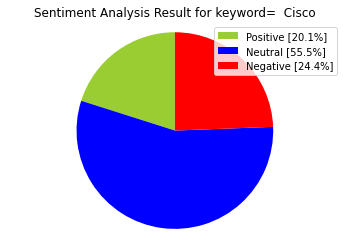

In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

Extracting text values

In [ ]:
import pandas as pd
tw_list = pd.read_csv('tweets.csv')
tw_list

Unnamed: 0                                                  0  \
0             0  @JanHacker9 @YouTube @Cisco “If wars can be st...   
1             1  RT @ApoticaGH: The more you see, the more you ...   
2             2                                       123\n\nxalj3   
3             3                                  just memorize the   
4             4  RT @joeclark947: @WIRED @CIOonline @avast_anti...   
..          ...                                                ...   
314         365  India's enterprise networking market grows 6.9...   
315         366  @EarthJill @BradyStrachan Maybe you’re thinkin...   
316         367  People in AZ treat stop signs like yield signs...   
317         368            RT @Dodgers: W. https://t.co/n08ZnZQdK0   
318         369  Indian Defence News #Sigfox #covid via https:/...   

                                                  text  polarity  \
0           if wars can be started by lies  peace c...  0.000000   
1     the more you see  the more you solve  the mor...  0.416667   
2                                           123  xalj3  0.000000   
3                                    just memorize the  0.000000   
4                         antivirus                     0.000000   
..                                                 ...       ...   
314  india s enterprise networking market grows 6 9...  0.000000   
315      maybe you re thinking of cisco  right near...  0.285714   
316  people in az treat stop signs like yield signs... -0.200000   
317                                               w     0.000000   
318         indian defence news  sigfox  covid via      0.000000   

     subjectivity sentiment    neg    neu    pos  compound  
0        0.000000  negative  0.276  0.474  0.250   -0.1531  
1        0.562500  positive  0.000  0.713  0.287    0.7391  
2        0.000000   neutral  0.000  1.000  0.000    0.0000  
3        0.000000   neutral  0.000  1.000  0.000    0.0000  
4        0.000000   neutral  0.000  1.000  0.000    0.0000  
..            ...       ...    ...    ...    ...       ...  
314      0.000000   neutral  0.000  1.000  0.000    0.0000  
315      0.535714   neutral  0.000  1.000  0.000    0.0000  
316      0.300000  positive  0.089  0.488  0.423    0.8020  
317      0.000000   neutral  0.000  0.000  0.000    0.0000  
318      0.000000  positive  0.000  0.781  0.219    0.1027  

[319 rows x 10 columns]

In [ ]:
# Load the dataset
tw_list = pd.read_csv('tweets.csv')

# Descriptive statistics
desc_stats = tw_list.describe(include='all')

# Number of missing values
missing_values = tw_list.isnull().sum()

# Count of unique values
unique_counts = tw_list.nunique()

# Correlation matrix
correlation_matrix = tw_list.corr()

# Combine all the results into a single dataframe
eda_results = pd.concat([missing_values, unique_counts, desc_stats.transpose()],
                        axis=1,
                        keys=['Missing Values', 'Unique Counts', 'Stats'])

<ipython-input-4-88be10a52ff9>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = tw_list.corr()


In [ ]:
# Load the dataset
tw_list = pd.read_csv('tweets.csv')

# Print general information
print("General Information:")
print("--------------------")
tw_list.info()




General Information:
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    319 non-null    int64  
 1   0             319 non-null    object 
 2   text          319 non-null    object 
 3   polarity      319 non-null    float64
 4   subjectivity  319 non-null    float64
 5   sentiment     319 non-null    object 
 6   neg           319 non-null    float64
 7   neu           319 non-null    float64
 8   pos           319 non-null    float64
 9   compound      319 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 25.0+ KB


In [ ]:
# Print descriptive statistics
print("Descriptive Statistics:")
print("-----------------------")
print(tw_list.describe())




Descriptive Statistics:
-----------------------
       Unnamed: 0    polarity  subjectivity         neg         neu  \
count  319.000000  319.000000    319.000000  319.000000  319.000000   
mean   181.181818    0.111531      0.225963    0.036511    0.777774   
std    106.207928    0.220706      0.316263    0.102975    0.290819   
min      0.000000   -0.600000      0.000000    0.000000    0.000000   
25%     88.500000    0.000000      0.000000    0.000000    0.708000   
50%    186.000000    0.000000      0.000000    0.000000    0.862000   
75%    268.500000    0.200000      0.500000    0.000000    1.000000   
max    369.000000    1.000000      1.000000    1.000000    1.000000   

              pos    compound  
count  319.000000  319.000000  
mean     0.101075    0.150724  
std      0.153366    0.320779  
min      0.000000   -0.900100  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.193000    0.371500  
max      0.787000    0.947700  


In [ ]:


# Print number of missing values
print("Missing Values:")
print("----------------")
print(tw_list.isnull().sum())
print("\n")


Missing Values:
----------------
Unnamed: 0      0
0               0
text            0
polarity        0
subjectivity    0
sentiment       0
neg             0
neu             0
pos             0
compound        0
dtype: int64




In [ ]:

# Print count of unique values
print("Unique Counts:")
print("----------------")
print(tw_list.nunique())
print("\n")



Unique Counts:
----------------
Unnamed: 0      319
0               319
text            273
polarity         52
subjectivity     54
sentiment         3
neg              41
neu             102
pos              85
compound         66
dtype: int64




In [ ]:

# Print value counts for the 'sentiment' column
print("Value Counts for 'sentiment' Column:")
print("-----------------------------------")
print(tw_list['sentiment'].value_counts())
print("\n")


Value Counts for 'sentiment' Column:
-----------------------------------
neutral     153
positive    119
negative     47
Name: sentiment, dtype: int64




In [ ]:

# Print the correlation matrix
print("Correlation Matrix:")
print("--------------------")
print(tw_list.corr())
print("\n")

Correlation Matrix:
--------------------
              Unnamed: 0  polarity  subjectivity       neg       neu  \
Unnamed: 0      1.000000  0.080267      0.098956 -0.191770  0.009909   
polarity        0.080267  1.000000      0.630462 -0.117398 -0.135674   
subjectivity    0.098956  0.630462      1.000000 -0.087009 -0.033359   
neg            -0.191770 -0.117398     -0.087009  1.000000 -0.185406   
neu             0.009909 -0.135674     -0.033359 -0.185406  1.000000   
pos             0.141032  0.615916      0.517259 -0.123564 -0.291175   
compound        0.147068  0.611957      0.523791 -0.420651 -0.152490   

                   pos  compound  
Unnamed: 0    0.141032  0.147068  
polarity      0.615916  0.611957  
subjectivity  0.517259  0.523791  
neg          -0.123564 -0.420651  
neu          -0.291175 -0.152490  
pos           1.000000  0.831769  
compound      0.831769  1.000000  




<ipython-input-17-9005cb869a9e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(tw_list.corr())


In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list.head(5)

0  \
0  @wrestling_1000 @MLB @astros That substance is...   
1  @freddier Gracias bro. Casi me embarco en Cisc...   
2  @dandythemascot @MLB @astros Now say that with...   
3  @62Cerise Salut à toi. \n\nPas assez mais déjà...   
4  RT @JarnoQuamfyShow: @Quamfynavas Straight fro...   

                                                text  
0  @wrestling_1000 @MLB @astros That substance is...  
1  @freddier Gracias bro. Casi me embarco en Cisc...  
2  @dandythemascot @MLB @astros Now say that with...  
3  @62Cerise Salut à toi. \n\nPas assez mais déjà...  
4  RT @JarnoQuamfyShow: @Quamfynavas Straight fro...

clean RT, link, punctuation characters and finally convert to lowercase.

In [ ]:
#Cleaning Text

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
#using regex to clean the text data
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

0  \
0  @wrestling_1000 @MLB @astros That substance is...   
1  @freddier Gracias bro. Casi me embarco en Cisc...   
2  @dandythemascot @MLB @astros Now say that with...   
3  @62Cerise Salut à toi. \n\nPas assez mais déjà...   
4  RT @JarnoQuamfyShow: @Quamfynavas Straight fro...   
5  @Guy_Nason @MLB @astros @Noahsyndergaard Who g...   
6  @Lili_Galipette Salut à toi. https://t.co/zSWk...   
7  @DarthMets @MLB @astros Should be 3, Pressly u...   
8                                                The   
9  RT @freddier: 🎫 ¿Qué certificaciones técnicas ...   

                                                text  
0           1000     that substance is called skill   
1    gracias bro  casi me embarco en cisco  me la...  
2                       now say that without crying   
3         salut   toi    pas assez mais d j  au taf   
4     straight from the frontline at cisco where ...  
5    nason       who gives a shit what he thinks ...  
6                           galipette salut   toi     
7        should be 3  pressly uncharacteristicall...  
8                                                the  
9      qu  certificaciones t cnicas  de verdad  h...

#Calculating Negative, Positive, Neutral and Compound values

In [ ]:


tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

0  \
0  @wrestling_1000 @MLB @astros That substance is...   
1  @freddier Gracias bro. Casi me embarco en Cisc...   
2  @dandythemascot @MLB @astros Now say that with...   
3  @62Cerise Salut à toi. \n\nPas assez mais déjà...   
4  RT @JarnoQuamfyShow: @Quamfynavas Straight fro...   
5  @Guy_Nason @MLB @astros @Noahsyndergaard Who g...   
6  @Lili_Galipette Salut à toi. https://t.co/zSWk...   
7  @DarthMets @MLB @astros Should be 3, Pressly u...   
8                                                The   
9  RT @freddier: 🎫 ¿Qué certificaciones técnicas ...   

                                                text  polarity  subjectivity  \
0           1000     that substance is called skill        0.0         0.000   
1    gracias bro  casi me embarco en cisco  me la...       0.0         0.000   
2                       now say that without crying       -0.2         0.600   
3         salut   toi    pas assez mais d j  au taf        0.0         0.000   
4     straight from the frontline at cisco where ...       0.2         0.400   
5    nason       who gives a shit what he thinks ...      -0.2         0.800   
6                           galipette salut   toi          0.0         0.000   
7        should be 3  pressly uncharacteristicall...      -0.3         0.525   
8                                                the       0.0         0.000   
9      qu  certificaciones t cnicas  de verdad  h...       0.0         0.000   

  sentiment    neg    neu    pos  compound  
0   neutral  0.000  1.000  0.000    0.0000  
1   neutral  0.000  1.000  0.000    0.0000  
2  positive  0.000  0.610  0.390    0.3724  
3   neutral  0.000  1.000  0.000    0.0000  
4  positive  0.000  0.806  0.194    0.4767  
5  negative  0.279  0.721  0.000   -0.7003  
6   neutral  0.000  1.000  0.000    0.0000  
7  negative  0.205  0.643  0.152   -0.2263  
8   neutral  0.000  1.000  0.000    0.0000  
9  negative  0.167  0.833  0.000   -0.5574

In [ ]:
import plotly.express as px

# Common parameters for the histograms
hist_params = {
    'nbins': 20,
    'labels': {'value': 'Count'}
}

# Histogram for Open prices with blue color
fig_open = px.histogram(cisco_stock, x='Open', title='Distribution of Opening Prices', color_discrete_sequence=['blue'], **hist_params)
fig_open.update_layout(font=dict(size=16), annotations=[dict(x=0.5, y=-0.2, xref="paper", yref="paper", text="Caption: Histogram showing distribution of opening prices.", showarrow=False)])
fig_open.show()

# Histogram for High prices with green color
fig_high = px.histogram(cisco_stock, x='High', title='Distribution of High Prices', color_discrete_sequence=['green'], **hist_params)
fig_high.update_layout(font=dict(size=16), annotations=[dict(x=0.5, y=-0.2, xref="paper", yref="paper", text="Caption: Histogram showing distribution of high prices.", showarrow=False)])
fig_high.show()

# Histogram for Low prices with red color
fig_low = px.histogram(cisco_stock, x='Low', title='Distribution of Low Prices', color_discrete_sequence=['red'], **hist_params)
fig_low.update_layout(font=dict(size=16), annotations=[dict(x=0.5, y=-0.2, xref="paper", yref="paper", text="Caption: Histogram showing distribution of low prices.", showarrow=False)])
fig_low.show()

# Histogram for Close prices with yellow color
fig_close = px.histogram(cisco_stock, x='Close', title='Distribution of Closing Prices', color_discrete_sequence=['yellow'], **hist_params)
fig_close.update_layout(font=dict(size=16), annotations=[dict(x=0.5, y=-0.2, xref="paper", yref="paper", text="Caption: Histogram showing distribution of closing prices.", showarrow=False)])
fig_close.show()

# Histogram for Volume with purple color
fig_volume = px.histogram(cisco_stock, x='Volume', title='Distribution of Trade Volumes', color_discrete_sequence=['purple'], **hist_params)
fig_volume.update_layout(font=dict(size=16), annotations=[dict(x=0.5, y=-0.2, xref="paper", yref="paper", text="Caption: Histogram showing distribution of trade volumes.", showarrow=False)])
fig_volume.show()


In [ ]:
import plotly.express as px

# Common parameters for the histograms
hist_params = {
    'nbins': 20,  # Adjusting the bin number from default 10
    'labels': {'value': 'Count'}  # Y-axis label
}

# Histogram for polarity with blue color
fig_polarity = px.histogram(tw_list, x='polarity', title='Distribution of Polarity', color_discrete_sequence=['blue'], **hist_params)
fig_polarity.update_layout(font=dict(size=16))  # Increasing the font size
fig_polarity.show()

# Histogram for subjectivity with green color
fig_subjectivity = px.histogram(tw_list, x='subjectivity', title='Distribution of Subjectivity', color_discrete_sequence=['green'], **hist_params)
fig_subjectivity.update_layout(font=dict(size=16))
fig_subjectivity.show()

# Histogram for negative sentiment scores with red color
fig_neg = px.histogram(tw_list, x='neg', title='Distribution of Negative Sentiment Scores', color_discrete_sequence=['red'], **hist_params)
fig_neg.update_layout(font=dict(size=16))
fig_neg.show()

# Histogram for neutral sentiment scores with yellow color
fig_neu = px.histogram(tw_list, x='neu', title='Distribution of Neutral Sentiment Scores', color_discrete_sequence=['yellow'], **hist_params)
fig_neu.update_layout(font=dict(size=16))
fig_neu.show()

# Histogram for positive sentiment scores with purple color
fig_pos = px.histogram(tw_list, x='pos', title='Distribution of Positive Sentiment Scores', color_discrete_sequence=['purple'], **hist_params)
fig_pos.update_layout(font=dict(size=16))
fig_pos.show()

# Histogram for compound sentiment scores with orange color
fig_compound = px.histogram(tw_list, x='compound', title='Distribution of Compound Sentiment Scores', color_discrete_sequence=['orange'], **hist_params)
fig_compound.update_layout(font=dict(size=16))
fig_compound.show()

In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

Total  Percentage
neutral     153       47.96
positive    119       37.30
negative     47       14.73

**Distribution of overall sentiment**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


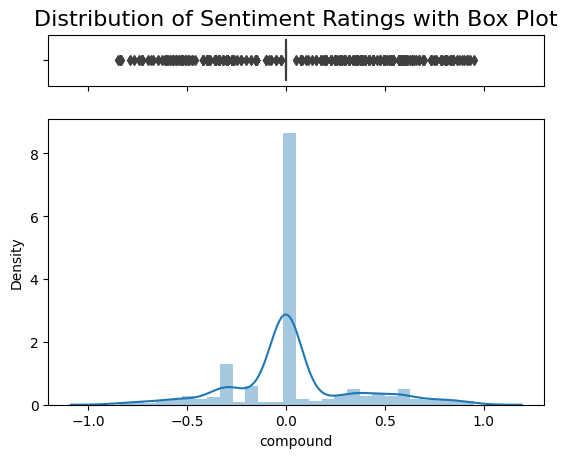

In [ ]:
# Cut the window in 2 parts
import seaborn as sns
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
fig = sns.boxplot(tw_list["compound"], ax=ax_box)
fig = sns.distplot(tw_list["compound"], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# Change figure size
fig = sns.set(rc={'figure.figsize':(11.7, 8.27)})

# Move title up on y axis
plt.title("Distribution of Sentiment Ratings with Box Plot", y=1.3, fontsize = 16);

#Word Cloud

Word Cloud Saved Successfully


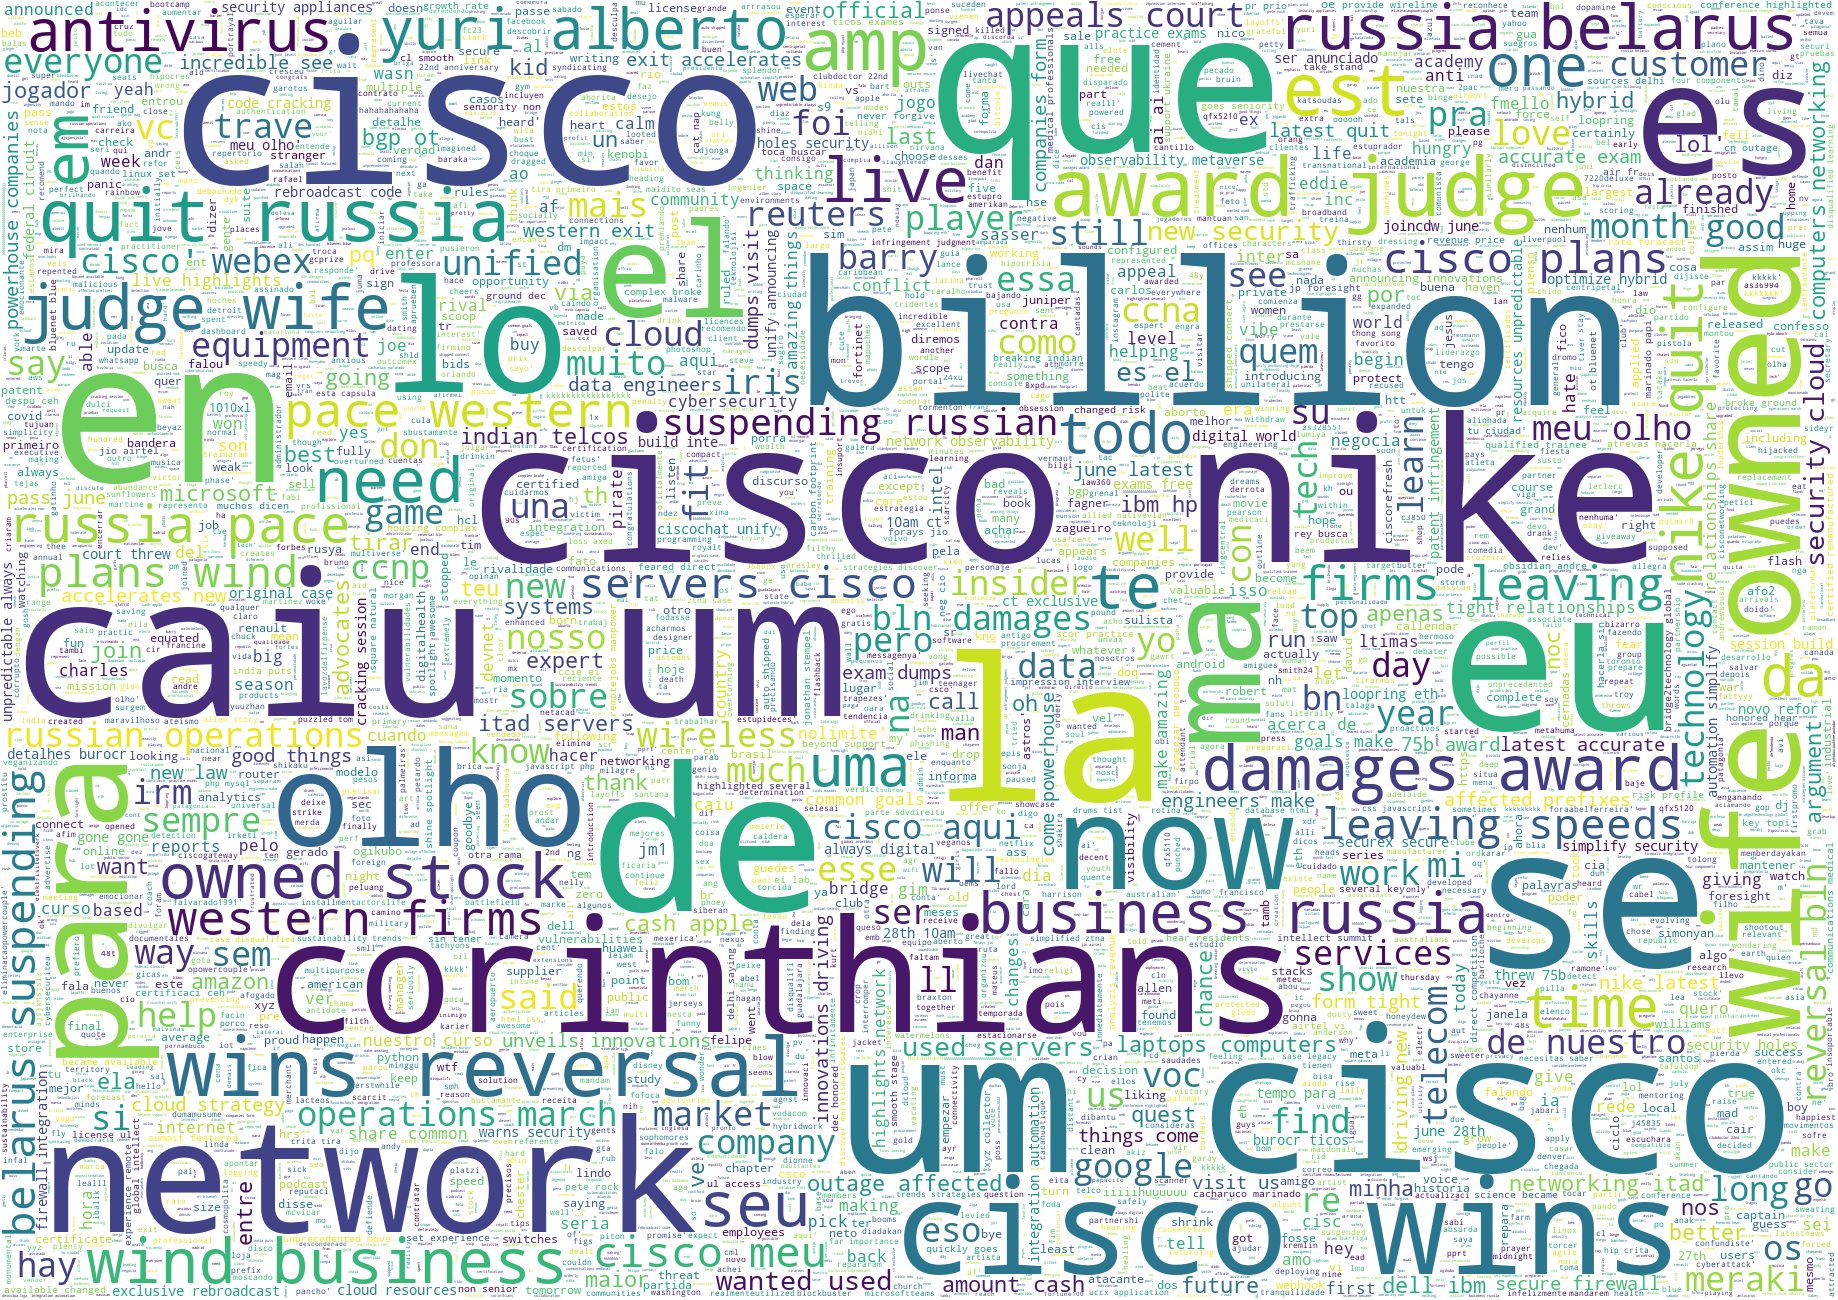

In [ ]:
#Function to Create Wordcloud
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt

#Function to Create Wordcloud
def create_wordcloud(text):
 mask = np.array(Image.open('cloud.png'))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color='white',
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file('wc.png')
 print('Word Cloud Saved Successfully')
 path='wc.png'
 display(Image.open(path))

#Creating wordcloud for all tweets
create_wordcloud(tw_list['text'].values)

Positive sentiments wordcloud

Word Cloud Saved Successfully


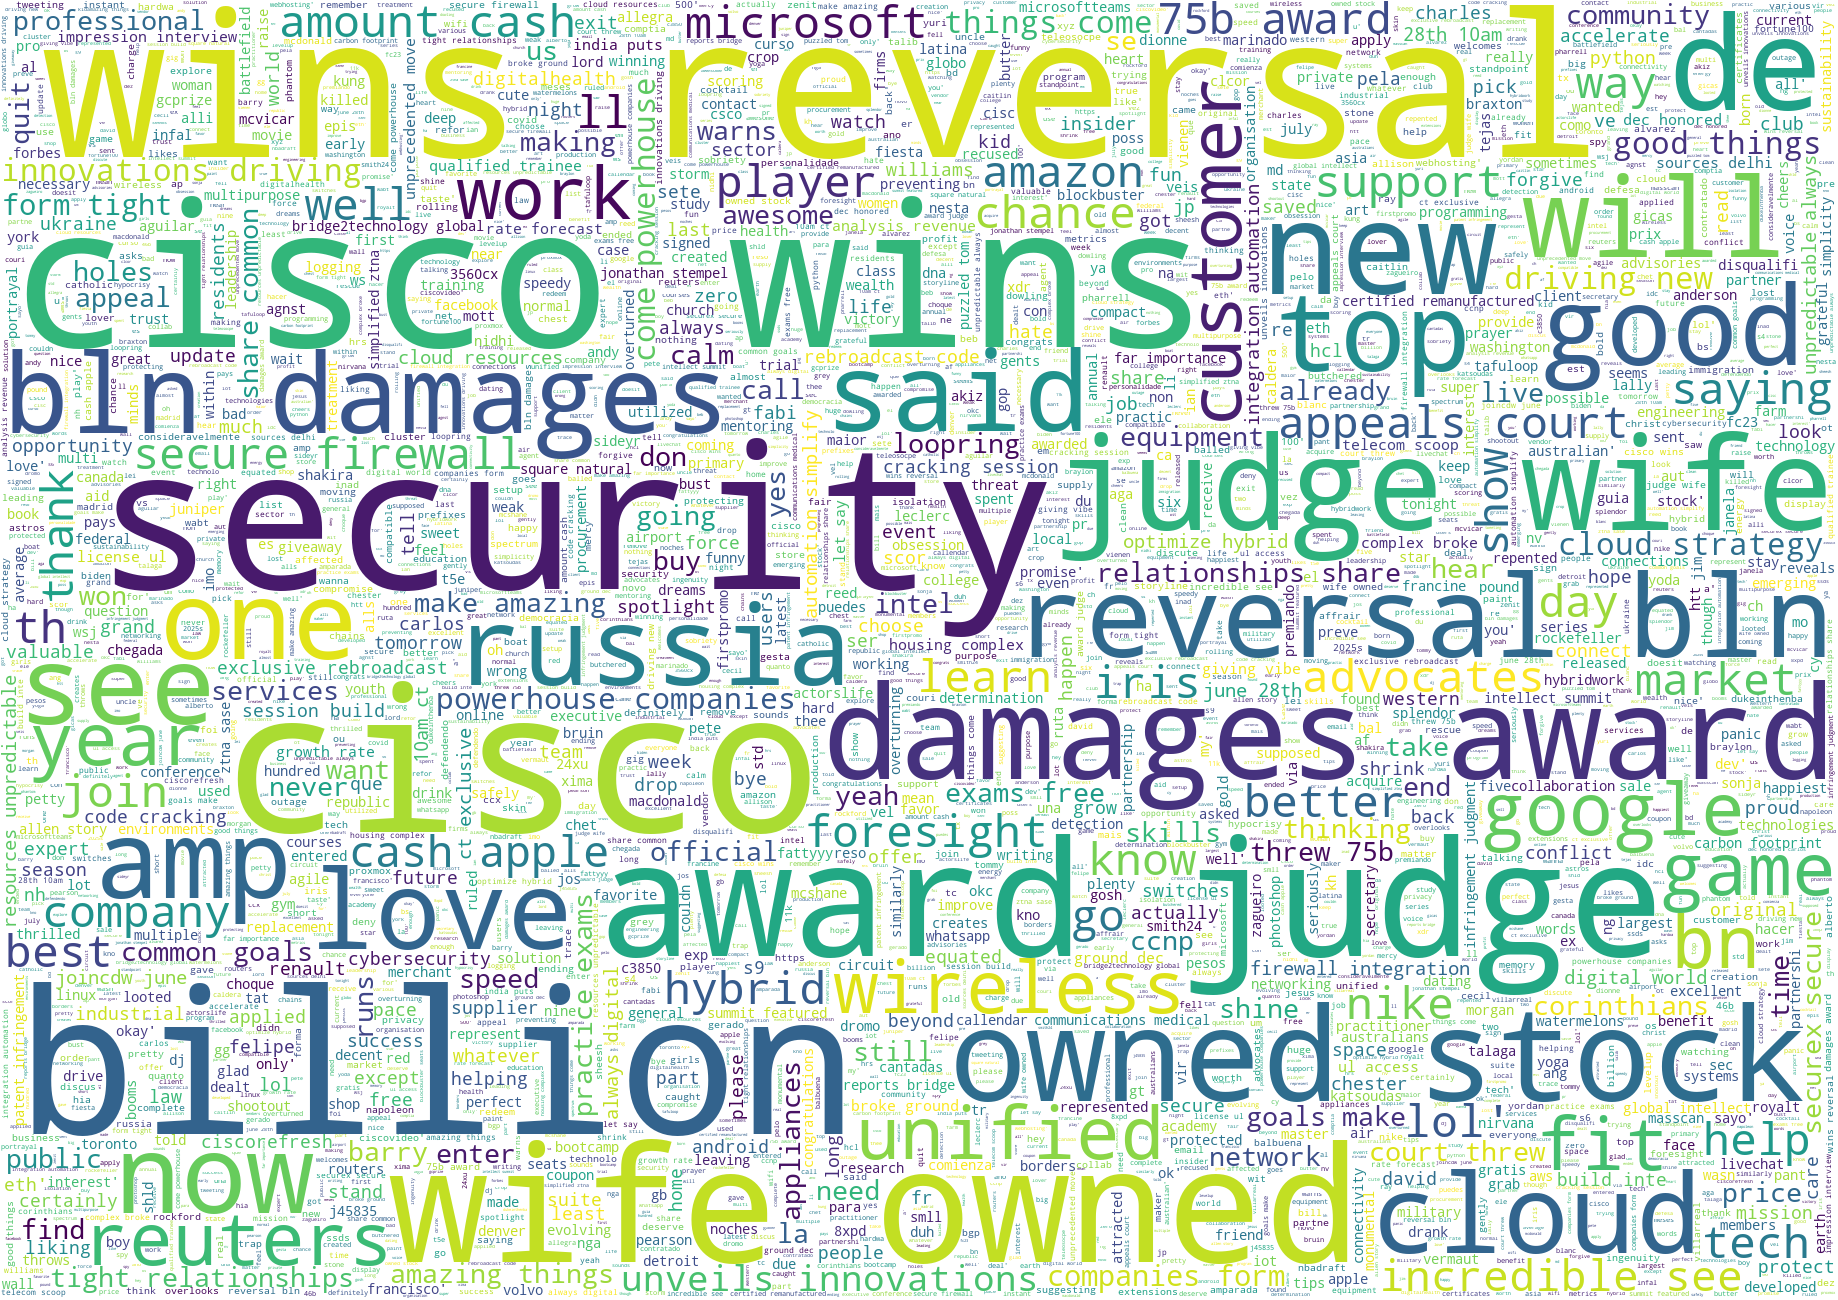

In [ ]:
create_wordcloud(tw_list_positive['text'].values)

Negative sentiments wordcould

Word Cloud Saved Successfully


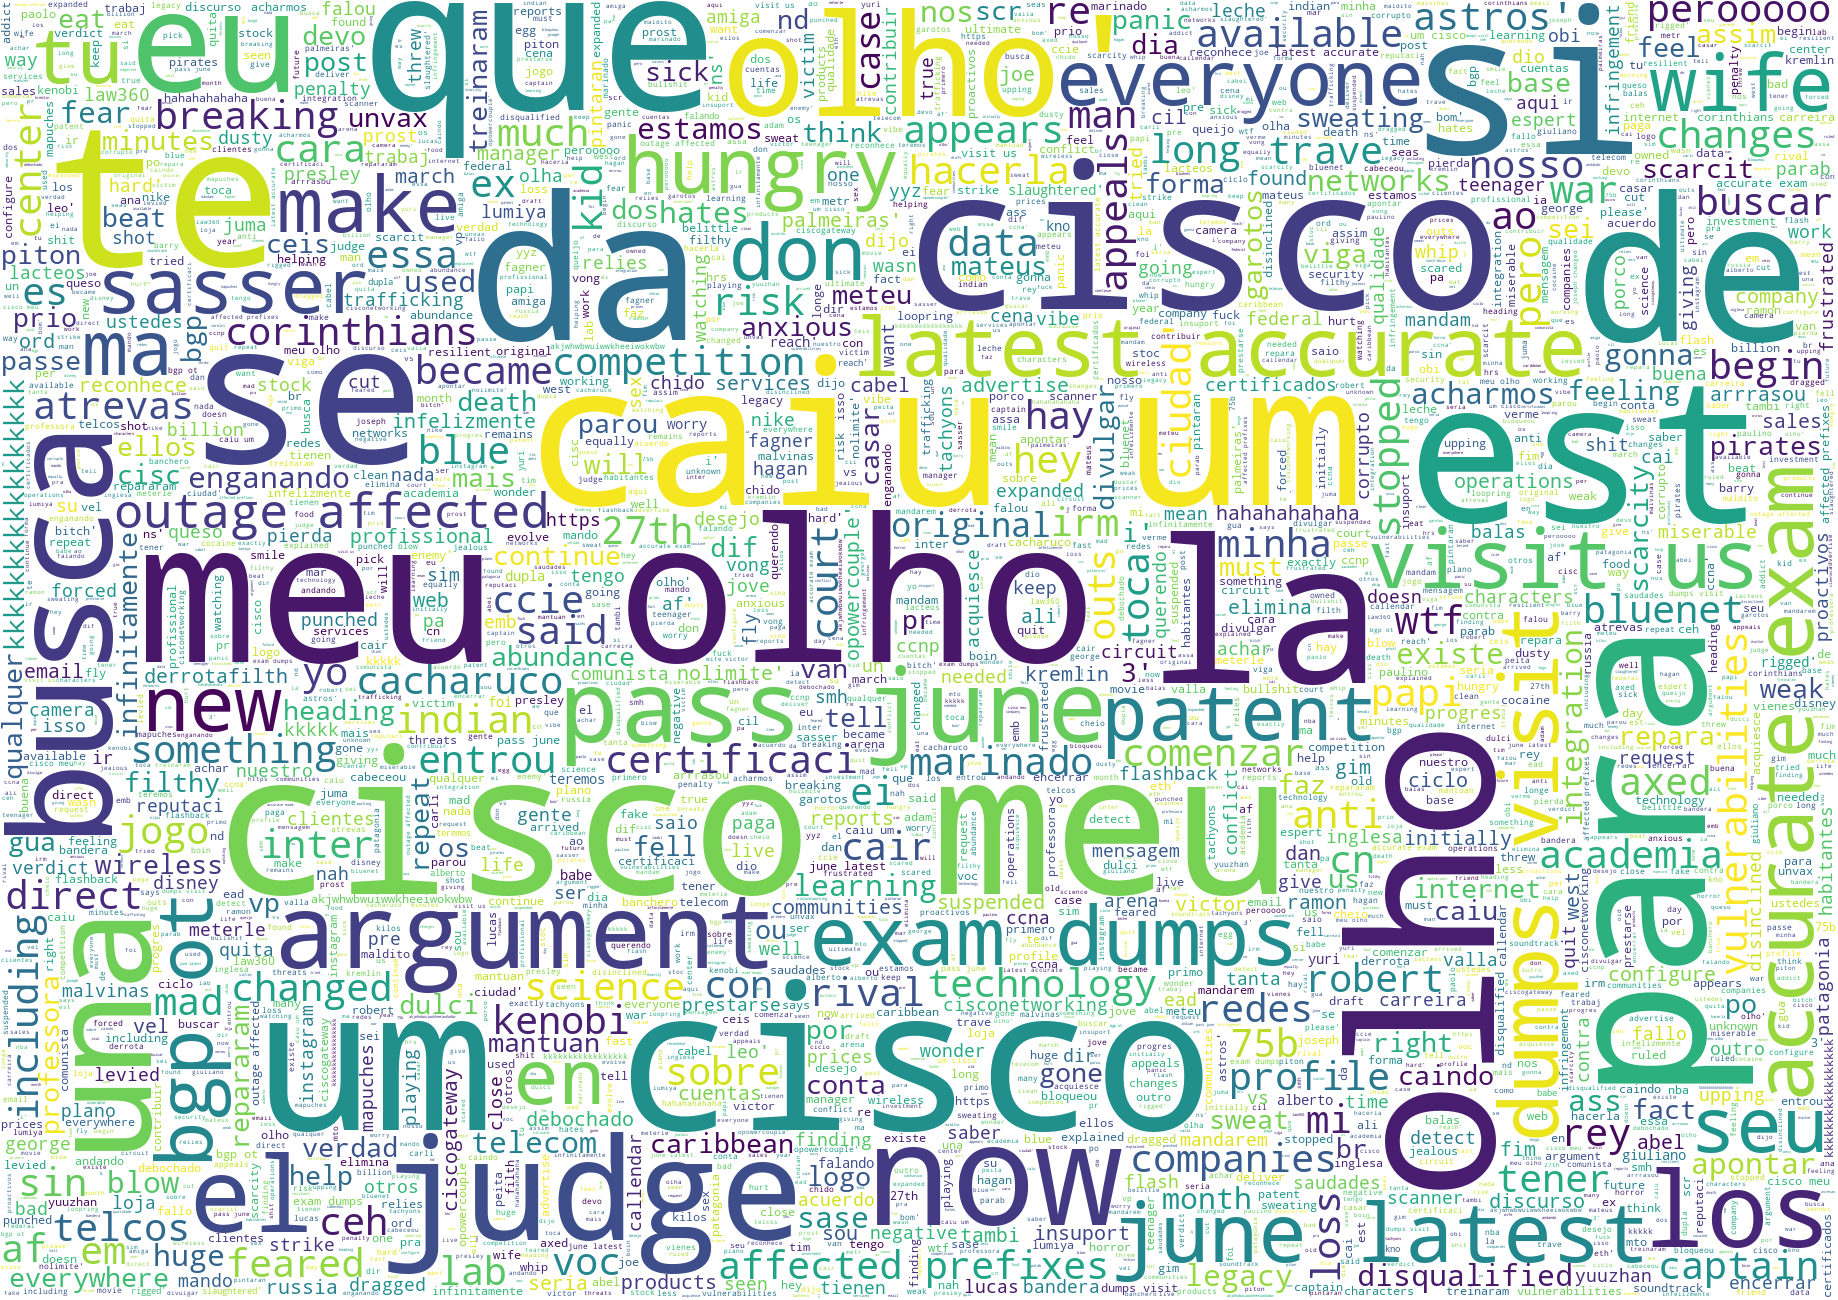

In [ ]:
create_wordcloud(tw_list_negative['text'].values)

# Sentiment and stock trend

In this section, we extract twitter data with datetime, However, twitter has limitation of only permitting gettting data till the past week. So error occurs when the loop finish collecting data and reaches certain date(a week ago)

In [ ]:
from datetime import datetime, timedelta
import requests
import pandas as pd

def get_data(tweet):
    data = {
        'id': tweet['id'],
        'created_at': tweet['created_at'],
        'text': tweet['text']
    }
    return data
# read bearer token for authentication
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAADpFeAEAAAAAy4BmZXDlt9l6p7ZoHYYsgDMrBaY%3DfbTJNcn4qdzuR1FhsXS1KHVeFL6a3kO6CUyHrWq83CPzRbk9sF'


# read bearer token for authentication

# setup the API request
endpoint = 'https://api.twitter.com/2/tweets/search/recent'
headers = {'authorization': f'Bearer {BEARER_TOKEN}'}
params = {
    'query': '(cisco) (lang:en)',
    'max_results': '100',
    'tweet.fields': 'created_at,lang'
}

dtformat = '%Y-%m-%dT%H:%M:%SZ'  # the date format string required by twitter

# we use this function to subtract 60 mins from our datetime string


def time_travel(now, mins):
    now = datetime.strptime(now, dtformat)
    back_in_time = now - timedelta(minutes=mins)
    return back_in_time.strftime(dtformat)

now = datetime.now() - timedelta(days = 1)  # get the current datetime, this is our starting point
last_week = now - timedelta(days=7)  # datetime one week ago = the finish line
now = now.strftime(dtformat)  # convert now datetime to format for API

df = pd.DataFrame()  # initialize dataframe to store tweets

df = pd.DataFrame()  # initialize dataframe to store tweets

while True:
    pre60 = time_travel(now, 60)  # get 60 minutes before 'now'
    # assign from and to datetime parameters for the API
    params['start_time'] = pre60
    params['end_time'] = now
    response = requests.get(endpoint,
                            params=params,
                            headers=headers)  # send the request
    now = pre60  # move the window 60 minutes earlier
    # iteratively append our tweet data to our dataframe
    for tweet in response.json()['data']:
        row = get_data(tweet)  # we defined this function earlier
        df = df.append(row, ignore_index=True)

Convert rfc time format to string

In [ ]:
time = []
for i in df['created_at']:
  time.append(i.replace('T', ' ')[0:16])
df['time'] = time

Time series Twitter API with key words: Cisco

In [ ]:
df

id                created_at  \
0      1540188483830128641  2022-06-24T04:22:04.000Z   
1      1540188448971141126  2022-06-24T04:21:56.000Z   
2      1540188427366408198  2022-06-24T04:21:51.000Z   
3      1540188404553777152  2022-06-24T04:21:45.000Z   
4      1540187852402790400  2022-06-24T04:19:33.000Z   
...                    ...                       ...   
11850  1538031285419003904  2022-06-18T05:30:08.000Z   
11851  1538031234416201730  2022-06-18T05:29:56.000Z   
11852  1538031094649565185  2022-06-18T05:29:22.000Z   
11853  1538030946317762563  2022-06-18T05:28:47.000Z   
11854  1538030006252687360  2022-06-18T05:25:03.000Z   

                                                    text              time  
0      The Rise of the Enterprise Developer https://t...  2022-06-24 04:22  
1      RT @afamilyguy: Hey @Cisco what changes on Jun...  2022-06-24 04:21  
2      Cisco CCNP Security - SCOR 350-701 Practice Ex...  2022-06-24 04:21  
3      RT @TheKenWeb: It’s the license under which In...  2022-06-24 04:21  
4      RT @Reuters: Cisco wins reversal of $2.75 bln ...  2022-06-24 04:19  
...                                                  ...               ...  
11850  Webex Delivers Innovation for IT Pros at Cisco...  2022-06-18 05:30  
11851  @NintenCisco Knock em dead Trainer Cisco! 😤 ht...  2022-06-18 05:29  
11852  @BlueSideParks She squirmed just a bit as she ...  2022-06-18 05:29  
11853  ⭐ Powered by automation, enhanced visibility, ...  2022-06-18 05:28  
11854  @diwwwmple @CiscoNetAcad @Cisco @LauraMQuintan...  2022-06-18 05:25  

[11855 rows x 4 columns]

**Extract Cisco's stock data(by Yahoo finance) within the same time period of the twitter text data**

In [ ]:
#!pip install yfinance
#data = df
import yfinance as yf
cisco = yf.Ticker("CSCO")
cisco_stock = cisco.history(
    start = '2023-10-01',
    end = '2023-10-06',
    #setting time interval
     interval='1m'
).reset_index()

In [ ]:
time_list = []
for i in cisco_stock['Datetime']:
  time_list.append(str(i)[0:16])
cisco_stock['time'] = time_list

In [ ]:
cisco_stock

Datetime       Open       High        Low      Close  \
0    2023-10-02 09:30:00-04:00  53.840000  54.189999  53.840000  54.189999   
1    2023-10-02 09:31:00-04:00  54.200001  54.312302  54.200001  54.240002   
2    2023-10-02 09:32:00-04:00  54.250000  54.375000  54.240002  54.369999   
3    2023-10-02 09:33:00-04:00  54.360001  54.380001  54.299999  54.310001   
4    2023-10-02 09:34:00-04:00  54.320000  54.320000  54.259998  54.315601   
...                        ...        ...        ...        ...        ...   
1553 2023-10-05 15:55:00-04:00  53.110001  53.110001  53.040001  53.049999   
1554 2023-10-05 15:56:00-04:00  53.049999  53.049999  53.014999  53.029999   
1555 2023-10-05 15:57:00-04:00  53.035000  53.070000  53.029999  53.049999   
1556 2023-10-05 15:58:00-04:00  53.060001  53.080002  53.049999  53.075001   
1557 2023-10-05 15:59:00-04:00  53.075001  53.080002  53.040001  53.070000   

      Volume  Dividends  Stock Splits              time  
0     466425        0.0           0.0  2023-10-02 09:30  
1     191569        0.0           0.0  2023-10-02 09:31  
2      56747        0.0           0.0  2023-10-02 09:32  
3      68152        0.0           0.0  2023-10-02 09:33  
4      41823        0.0           0.0  2023-10-02 09:34  
...      ...        ...           ...               ...  
1553  174997        0.0           0.0  2023-10-05 15:55  
1554   80140        0.0           0.0  2023-10-05 15:56  
1555  122183        0.0           0.0  2023-10-05 15:57  
1556  126113        0.0           0.0  2023-10-05 15:58  
1557  346497        0.0           0.0  2023-10-05 15:59  

[1558 rows x 9 columns]

In [ ]:
import pandas as pd

# Sample data (using cisco_stock dataset)
# Assuming the dataset is loaded in a DataFrame named `cisco_stock`

# 1. General Information
print("General Information:")
print("--------------------")
print(cisco_stock.info())
print("\n")

# 2. Descriptive Statistics
print("Descriptive Statistics:")
print("-----------------------")
print(cisco_stock.describe())
print("\n")

# 3. Missing Values
print("Missing Values:")
print("----------------")
print(cisco_stock.isnull().sum())
print("\n")

# 4. Unique Counts
print("Unique Counts:")
print("----------------")
print(cisco_stock.nunique())
print("\n")

# 5. Value Counts for non-numeric columns (for demonstration, I'm using the 'Dividends' column)
print("Value Counts for 'Dividends' Column:")
print("-----------------------------------")
print(cisco_stock['Dividends'].value_counts())
print("\n")

# 6. Correlation Matrix
print("Correlation Matrix:")
print("--------------------")
print(cisco_stock.corr())
print("\n")

General Information:
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Datetime      1558 non-null   datetime64[ns, America/New_York]
 1   Open          1558 non-null   float64                         
 2   High          1558 non-null   float64                         
 3   Low           1558 non-null   float64                         
 4   Close         1558 non-null   float64                         
 5   Volume        1558 non-null   int64                           
 6   Dividends     1558 non-null   float64                         
 7   Stock Splits  1558 non-null   float64                         
 8   time          1558 non-null   object                          
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1), object(1)
memory usage: 109.7+ KB
Non

<ipython-input-30-9158003b68de>:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(cisco_stock.corr())


#sentiemnt analysis for every tweets and groupby every minutes

In [ ]:
#sentiment analysis in timeseries
import nltk
nltk.download('vader_lexicon')
score_list = []
df = tw_list
for i in df['text']:
  score = SentimentIntensityAnalyzer().polarity_scores(i)['compound']
  score_list.append(score)

df['sentiment'] = score_list
sentiment_df = df.groupby('time').mean()

merge the twitter data with cisco stock prices on the same time at minute scale

In [ ]:
sentimemnt_df = sentiment_df.reset_index()
merge = cisco_stock.merge(sentiment_df, on='time', how='left', indicator=True)
merge = merge.dropna()
merge['time']= pd.to_datetime(df['time'])

Sentiment analysis vs stock close price

Text(0.5, 1.0, 'Sentiment analysis vs stock close price')

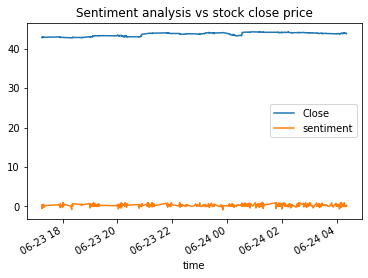

In [ ]:

merge.plot(x="time", y=["Close", "sentiment"]).set_title('Sentiment analysis vs stock close price')

 check correlation

In [ ]:
print(merge['Close'].corr(merge['sentiment']))

0.0840882843799623


# Stock price prediction by LSTM neural network

![picture](https://drive.google.com/file/d/1MQ2yzsEzmR3pstkT5Sxci0aLHHNM-t7C/view?usp=sharing)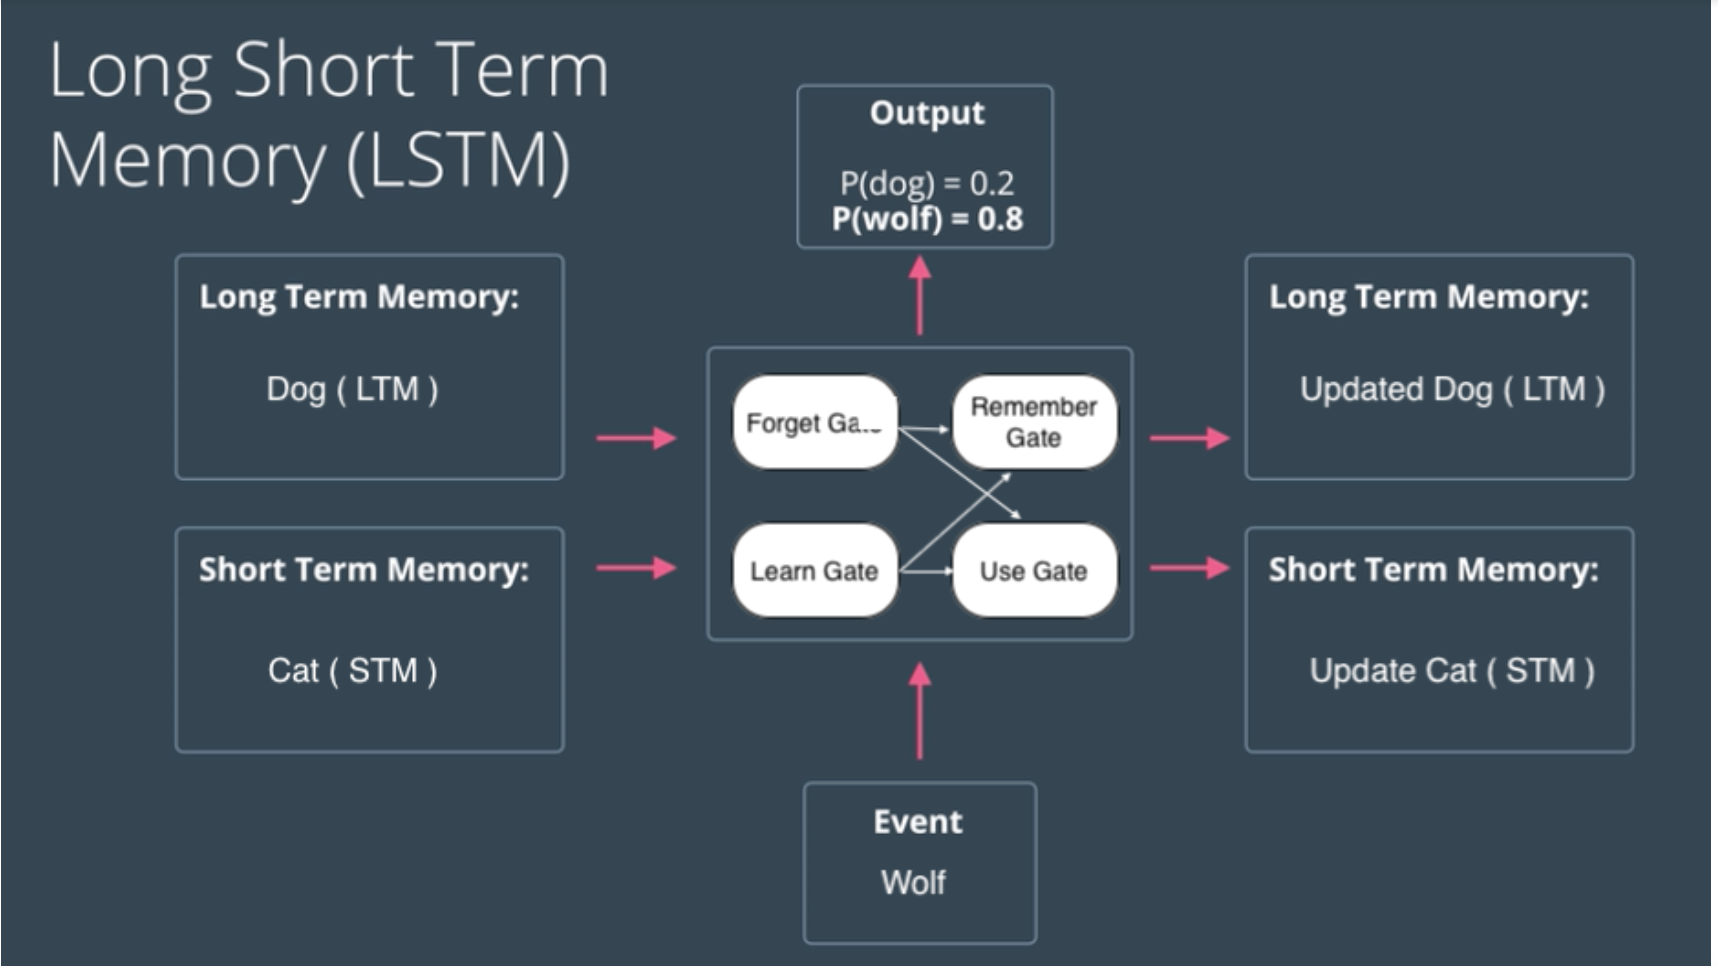

Forget Gate: LTM goes to forget gate and it forgets information that is not useful.

Learn Gate: Event ( current input ) and STM are combined together so that necessary information that we have recently learned from STM can be applied to the current input.

Remember Gate: LTM information that we haven’t forget and STM and Event are combined together in Remember gate which works as updated LTM.

Use Gate: This gate also uses LTM, STM, and Event to predict the output of the current event which works as an updated STM.

In [ ]:
#import library
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import libraries
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
merge.shape

(639, 11)

In [ ]:
#data preprocessing
cleaned_df = merge[['Close', 'sentiment', 'time']].set_index('time')
#split training and testing dataset into 80:20
train_df,test_df = cleaned_df[1:500], cleaned_df[500:]
training_set = cleaned_df[1:500].values
test_set = cleaned_df[500:].values
#transformer
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
#predict target
train_scaled_y = sc.fit_transform(cleaned_df[0:500][['Close']])
# Creating a data structure with 60 time-steps
hops = 60
no_records = 500
no_cols=1
X_train = []
y_train = []
for i in range(60, 500):
    X_train.append(training_set_scaled[i-60:i])
    y_train.append(train_scaled_y[i][0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
#Evaluation data
x_val = X_train[-139:]
y_val = y_train[-139:]
x_train = X_train[:-139]
y_train = y_train[:-139]
y_train.shape

In [1]:
#Baseline Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(None, 3)))  # First LSTM layer
model.add(Dropout(0.2))  # First Dropout layer
model.add(LSTM(units=50))  # Second LSTM layer
model.add(Dropout(0.2))  # Second Dropout layer
model.add(Dense(units=1))  # Dense layer for output
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])


# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_rmse = sqrt(mean_squared_error(y_train, train_predictions))
train_mae = mean_absolute_error(y_train, train_predictions)
test_rmse = sqrt(mean_squared_error(y_test, test_predictions))
test_mae = mean_absolute_error(y_test, test_predictions)

# Print model accuracy
print(f'Train Root Mean Squared Error (RMSE): {train_rmse:.2f}; Train Mean Absolute Error (MAE): {train_mae:.2f}')
print(f'Test Root Mean Squared Error (RMSE): {test_rmse:.2f}; Test Mean Absolute Error (MAE): {test_mae:.2f}')

Train Root Mean Squared Error (RMSE): 0.25; Train Mean Absolute Error (MAE): 0.08
Test Root Mean Squared Error (RMSE): 0.45; Test Mean Absolute Error (MAE): 0.18


In [ ]:
#hypertuning
def build_model(hp):
    model = Sequential()
    #Chossing the number of neurons
    #use the hp object to define a range of values the hyperparameter can take.
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32),return_sequences=True, input_shape=(x_train.shape[1],X_train.shape[2])))
    #Choosing the number of layers
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=32)))
    #Dropout layer
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(y_train.shape[0], activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
    return model

In [ ]:
!pip install -q -U keras-tuner
from kerastuner.tuners import RandomSearch
tuner= RandomSearch(
        build_model,
        objective='mse',
        max_trials=2,
        executions_per_trial=1
        )

In [2]:
tuner.search(
        x=x_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(x_val,y_val),
)


best_model = tuner.get_best_models(num_models=1)[0]
Y_pred = best_model.predict(x_val[0].reshape((1,x_val[0].shape[0], x_val[0].shape[1])))


best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 32)            8320      
                                                                 
 lstm_1 (LSTM)               (None, 60, 320)           451840    
                                                                 
 lstm_2 (LSTM)               (None, 60, 32)            45184     
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 301)               9933      
                                                                 
Total params: 523597 (2.00 MB)
Trainable params: 523597 

In [3]:
#Print out error metrics and generate model loss plot.
train_score = best_model.evaluate(x_train, y_train, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '
% (np.sqrt(train_score[0]), train_score[1]))
test_score = best_model.evaluate(x_val, y_val, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f '
% (np.sqrt(test_score[0]), test_score[1]))

Train Root Mean Squared Error (RMSE): 0.17; Train Mean Absolute Error (MAE): 0.03
Test Root Mean Squared Error (RMSE): 0.37; Test Mean Absolute Error (MAE): 0.14


In [4]:
train_score = best_model.evaluate(x_train, y_train, verbose=0)
print('Train Root Mean Squared Error (RMSE): %.2f; Train Mean Absolute Error (MAE): %.2f' % (np.sqrt(train_score[0]), train_score[1]))
test_score = best_model.evaluate(x_val, y_val, verbose=0)
print('Test Root Mean Squared Error (RMSE): %.2f; Test Mean Absolute Error (MAE): %.2f' % (np.sqrt(test_score[0]), test_score[1]))

train_predictions = best_model.predict(x_train)
test_predictions = best_model.predict(x_val)

train_diff = y_train - train_predictions.flatten()
test_diff = y_val - test_predictions.flatten()

std_train_diff = np.std(train_diff)
std_test_diff = np.std(test_diff)

print('Standard Deviation of Train Prediction Differences: %.2f' % std_train_diff)
print('Standard Deviation of Test Prediction Differences: %.2f' % std_test_diff)

Standard Deviation of Train Prediction Differences: 0.18
Standard Deviation of Test Prediction Differences: 0.31


**Prediction plot**

For this plot, I used the predicted results from test set to compare with the true price trend of test set in the same time range. The red line is the predicted price, and the blue line is the acutual price value. We could tell that the predicted results cannot capture the spikes(sharp increase or decrease) very well.

In [ ]:
plt.plot(Y_pred[0][-139:], color = 'red')
plt.plot(y_val, color = 'blue')
plt.title('LSTM prediction result on Test set')
plt.show()

**Conclusion**

According to the sentiment analysis of overal Cisco text data, we can tell that about 57% the tweets are neural, with 28% positive and 13% negative. Furthermore, the distribution of overal sentiment is approximately normal.
In the time-series tweet data, we can see that the general trend of the sentiment and the stock price is almost the same within the same time range. However, the correlation scores between these two features is low.

The innovation part of this project is to use the sentiment scores within a time range to predict the stock price. According the the results, this is reasonable since the Train Root Mean Squared Error(RMSE) is 0.17; Train Mean Absolute Error(MAE) is 0.03: Test Root Mean Squared Error(RMSE): 0.37; Test Mean Absolute Error(MAE) is 0.14, indicating the good prediction of the model.